In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
torch.manual_seed(1)
import time

In [0]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image 

In [0]:
def show_data(data_sample):
  plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE,IMAGE_SIZE),cmap='gray')

In [0]:
IMAGE_SIZE=16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),transforms.ToTensor()])


In [20]:
dataset_train = datasets.FashionMNIST(root = '',train=True,transform=composed,download=True)
dataset_validate = datasets.FashionMNIST(root='',train=False,transform=composed,download=True)


Extracting FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw


Extracting FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw




Extracting FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw


Extracting FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw
Processing...
Done!


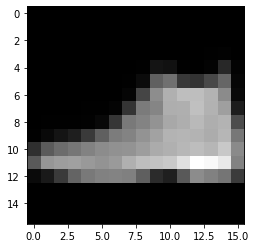

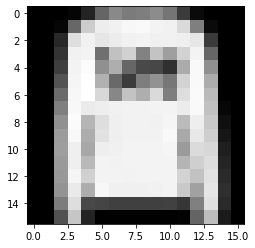

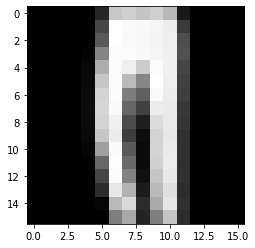

In [91]:
for i,data in enumerate(dataset_validate):
  show_data(data)
  plt.show()
  if i==2:
    break

In [0]:
class Cnn_batch(nn.Module):
  def __init__(self,out1_channels=16,out2_channels=32,classes=10):
    super(Cnn_batch,self).__init__()
    self.cnn1=nn.Conv2d(in_channels=1,out_channels=out1_channels,kernel_size=5,padding=2)
    self.cnn1_bn=nn.BatchNorm2d(out1_channels)

    self.max1=nn.MaxPool2d(kernel_size=2)

    self.cnn2= nn.Conv2d(in_channels=out1_channels,out_channels=out2_channels,kernel_size=5,padding=2)
    self.cnn2_bn=nn.BatchNorm2d(out2_channels)

    self.max2=nn.MaxPool2d(kernel_size=2)

    self.linear=nn.Linear(out2_channels*4*4,classes)
    self.linear_bn=nn.BatchNorm1d(classes)

  def forward(self,x):
    x=self.cnn1(x)
    x=self.cnn1_bn(x)
    x=torch.relu(x)
    x=self.max1(x)

    x=self.cnn2(x)
    x=self.cnn2_bn(x)
    x=torch.relu(x)
    x=self.max2(x)

    x=x.view(x.size(0),-1)
    x=self.linear(x)
    x=self.linear_bn(x)

    return x 


In [0]:
def train_model(model,train_loader,validation_loader,criterion,optimizer,epochs):
  loss_list=[]
  accuracy_list=[]

  for epoch in range(epochs):
    cost=matched=0
    print("Epoch : ",epoch+1,"/",epochs)
    
    model.train()
    for x,y in train_loader:
      
      optimizer.zero_grad()
      y_out=model(x)
      loss=criterion(y_out,y)
      loss.backward()
      optimizer.step()
      cost+=loss.item()
    loss_list.append(cost)


    model.eval()
    for x_test,y_test in validation_loader:
         
      z=model(x_test)
      _,yout = torch.max(z.data,1)
      matched+=(yout==y_test).sum().item()
    accuracy=matched/len(validation_loader)
    accuracy_list.append(accuracy)

  return loss_list,accuracy_list    




In [0]:
model=Cnn_batch(16,32,10)

In [0]:
criterion=nn.CrossEntropyLoss()
train_loader=DataLoader(dataset=dataset_train,batch_size=100)
validation_loader=DataLoader(dataset=dataset_validate,batch_size=100)
learning_rate=0.1
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
epochs=10

In [86]:
loss_list,accuracy_list=train_model(model,train_loader,validation_loader,criterion,optimizer,epochs)

Epoch :  1 / 10
Epoch :  2 / 10
Epoch :  3 / 10
Epoch :  4 / 10
Epoch :  5 / 10
Epoch :  6 / 10
Epoch :  7 / 10
Epoch :  8 / 10
Epoch :  9 / 10
Epoch :  10 / 10


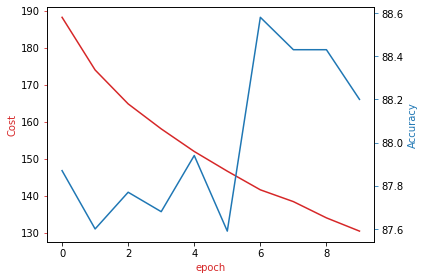

In [87]:
fig,ax1 = plt.subplots()
color='tab:red' 
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('Cost',color=color)
ax1.tick_params(axis='y',color=color)

ax2=ax1.twinx()
color='tab:blue'
ax2.set_ylabel('Accuracy',color=color)
ax2.set_xlabel('epoch',color=color)
ax2.plot(accuracy_list,color=color)
ax2.tick_params(axis='y',color=color)
fig.tight_layout()
